In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('/content/drive/MyDrive/Walmart Sales Project/data/ts_ARIMA_Walmart.csv',index_col='Date',parse_dates=True)
df.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


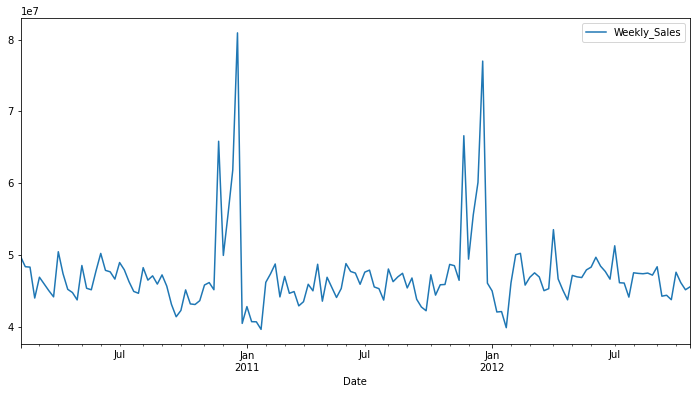

In [21]:
df.plot(figsize=(12,6))

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

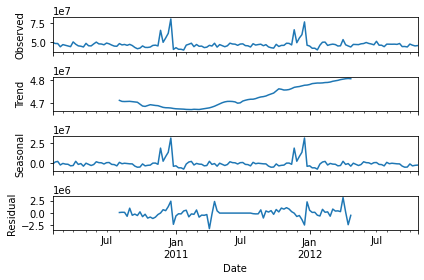

In [23]:
results = seasonal_decompose(df['Weekly_Sales'])
fig = results.plot()

In [24]:
size = int(len(df) * 0.667)
train, test = df[0:size], df[size:len(df)]

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
df.head(),df.tail()

(            Weekly_Sales
 Date                    
 2010-02-05   49750740.50
 2010-02-12   48336677.63
 2010-02-19   48276993.78
 2010-02-26   43968571.13
 2010-03-05   46871470.30,             Weekly_Sales
 Date                    
 2012-09-28   43734899.40
 2012-10-05   47566639.31
 2012-10-12   46128514.25
 2012-10-19   45122410.57
 2012-10-26   45544116.29)

In [27]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [28]:
scaled_train[:10]

array([[0.24559651],
       [0.21138385],
       [0.20993982],
       [0.10569932],
       [0.17593376],
       [0.1530439 ],
       [0.13038756],
       [0.10970086],
       [0.26188166],
       [0.18788154]])

In [29]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [31]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [32]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.24559651 0.21138385 0.20993982 0.10569932 0.17593376 0.1530439
 0.13038756 0.10970086 0.26188166 0.18788154 0.13509806 0.12422951]
Predict this y: 
 [[0.09932539]]


In [33]:
X.shape

(1, 12, 1)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [35]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(generator,epochs=50)

Epoch 1/50
83/83 [==============================] - 3s 10ms/step - loss: 0.0223
Epoch 2/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0196
Epoch 3/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0209
Epoch 4/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0194
Epoch 5/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0191
Epoch 6/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0188
Epoch 7/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0184
Epoch 8/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0195
Epoch 9/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0185
Epoch 10/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0187
Epoch 11/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0191
Epoch 12/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0181
Epoch 13/50
83/83 [=============================

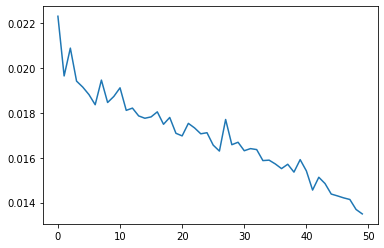

In [38]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [39]:
last_train_batch = scaled_train[-12:]

In [40]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [41]:
model.predict(last_train_batch)

array([[0.3495261]], dtype=float32)

In [42]:
scaled_test[0]

array([0.23688201])

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [44]:
test_predictions

[array([0.3495261], dtype=float32),
 array([0.3938667], dtype=float32),
 array([0.415283], dtype=float32),
 array([0.412012], dtype=float32),
 array([0.38235083], dtype=float32),
 array([0.32993874], dtype=float32),
 array([0.2534516], dtype=float32),
 array([0.1783006], dtype=float32),
 array([0.13776724], dtype=float32),
 array([0.12346937], dtype=float32),
 array([0.12954465], dtype=float32),
 array([0.14414391], dtype=float32),
 array([0.14797507], dtype=float32),
 array([0.15574431], dtype=float32),
 array([0.16235802], dtype=float32),
 array([0.17085165], dtype=float32),
 array([0.18617234], dtype=float32),
 array([0.20744982], dtype=float32),
 array([0.22956337], dtype=float32),
 array([0.24762164], dtype=float32),
 array([0.26646528], dtype=float32),
 array([0.28289655], dtype=float32),
 array([0.29364443], dtype=float32),
 array([0.29557836], dtype=float32),
 array([0.2857415], dtype=float32),
 array([0.2636033], dtype=float32),
 array([0.23269218], dtype=float32),
 array([0.1

In [56]:
test.head()

,Weekly_Sales,Predictions
Date,,
2011-12-02,49390556.49,5.404631e+07
2011-12-09,55561147.70,5.587898e+07
2011-12-16,60085695.94,5.676415e+07
2011-12-23,76998241.31,5.662895e+07
2011-12-30,46042461.04,5.540301e+07


In [57]:
true_predictions = scaler.inverse_transform(test_predictions)

In [58]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


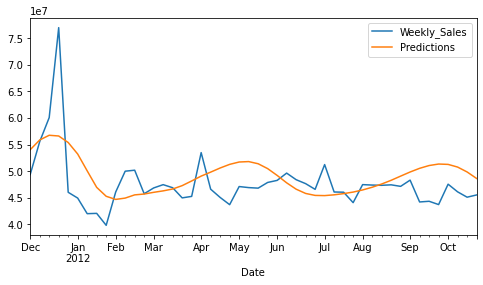

In [59]:
test.plot(figsize=(8,4))

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Weekly_Sales'],test['Predictions']))
print(rmse)

5097790.393359829
